# ADP 실기 27회 머신러닝
## 신용카드 이상탐지 데이터 : 차원축소, 오버/언더샘플링, 이상탐지
- 캐글 데이터에서 일부 정제한 데이터가 사용
- 해당 데이터에서 V1~V17 컬럼만 사용(총 컬럼 20개), 약 1,193건의 데이터
    - 사용자 ID 및 민감한 기능(v1-v28)을 보호하기 위해 변환된 정보 

- Time : 트랜잭션 시간, 의미 없음  
- Amount : 신용카드 사용 금액
- Class : 0은 정상, 1은 사기

- 1.1) EDA 데이터 탐색
- 1-2) 변수간 상관관계를 시각화하고 전처리가 필요함을 설명하라
<br/>

- 2-1) 차원축소 방법 2가지 이상 비교하고 한가지 선택 (종류와 장/단점)
- 2-2) 추천한 한 가지를 실제로 수행하고 선택한 이유 설명
<br/>

- 3-1) 오버샘플링과 언더샘플링 장단점 비교 및 선택 구현
- 3-2) 구현 및 알고리즘 2가지 이상 비교, 성능 측정
- 3-3) 현재까지 전처리한 데이터를 통해 모델 수행 후 결과 분석
<br/>

- 4-1) 이상탐지 모델 2가지 이상 기술, 장/단점 설명
- 4-2) 2번에서 만든 데이터로 한 가지 이상탐지 모델을 구현하고, 3번에서 만든 모델과 비교
- 4-3) 데이터분석과 관점에서 3번에서 만든 모델과 4번에서 만든 모델 설명

In [1]:
# 일단 얘부터 입력 후 시작

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 메세지 숨기기
import warnings
warnings.filterwarnings("ignore")

## 1-1) EDA 및 데이터 탐색

In [2]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/problem1.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Amount,Class
0,60.0,1.069141,0.043786,0.309867,1.316694,-0.462394,-0.857888,0.207904,-0.191270,0.056398,0.041567,-0.507358,-0.108666,-0.473257,0.452046,1.005675,0.185441,-0.439976,89.40,0
1,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,0.00,1
2,426.0,-1.932055,1.724618,1.288229,-0.396998,-0.140202,2.470521,-1.865298,-5.186855,0.794764,0.155379,0.034517,0.906738,-0.027172,-0.404303,-0.473949,0.274034,-0.222340,16.19,0
3,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,529.00,1
4,674.0,-0.719065,0.638954,0.686335,-0.023240,2.317890,3.871978,-0.312797,1.089780,-0.596925,-0.006142,-0.242883,-0.384491,0.109079,0.187565,1.823472,0.274346,-0.697730,22.00,0


In [3]:
df.shape

(1193, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193 entries, 0 to 1192
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1193 non-null   float64
 1   V1      1193 non-null   float64
 2   V2      1193 non-null   float64
 3   V3      1193 non-null   float64
 4   V4      1193 non-null   float64
 5   V5      1193 non-null   float64
 6   V6      1193 non-null   float64
 7   V7      1193 non-null   float64
 8   V8      1193 non-null   float64
 9   V9      1193 non-null   float64
 10  V10     1193 non-null   float64
 11  V11     1193 non-null   float64
 12  V12     1193 non-null   float64
 13  V13     1193 non-null   float64
 14  V14     1193 non-null   float64
 15  V15     1193 non-null   float64
 16  V16     1193 non-null   float64
 17  V17     1193 non-null   float64
 18  Amount  1193 non-null   float64
 19  Class   1193 non-null   int64  
dtypes: float64(19), int64(1)
memory usage: 186.5 KB


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Amount,Class
count,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.00000,1193.000000
mean,91514.485331,-0.755027,0.543730,-1.148224,0.777816,-0.409181,-0.283953,-0.852545,0.145026,-0.446390,-0.904275,0.656342,-1.014185,0.011973,-1.168346,0.019232,-0.629529,-1.070657,88.88570,0.167645
std,47896.081947,3.622262,2.663928,3.908787,2.345566,2.702077,1.507579,3.396565,2.471559,1.664075,2.902608,1.957200,2.996734,1.013383,3.230613,0.908008,2.269400,3.812768,220.14133,0.373707
min,60.000000,-30.552380,-33.644637,-31.103685,-4.294888,-22.105532,-10.886820,-37.060311,-37.353443,-11.126624,-23.228255,-2.651584,-17.228662,-2.800154,-18.493773,-4.498945,-14.129855,-25.162799,0.00000,0.000000
25%,50265.000000,-1.302600,-0.435358,-1.609339,-0.610310,-0.842184,-1.017863,-0.806043,-0.219328,-1.039740,-0.883807,-0.601391,-0.967306,-0.692559,-0.950226,-0.549590,-0.701499,-0.682272,3.54000,0.000000
50%,81797.000000,-0.302521,0.231973,-0.234204,0.327567,-0.073622,-0.379633,-0.084983,0.073036,-0.210455,-0.226471,0.283080,-0.014046,0.023014,-0.099055,0.046894,-0.055831,-0.152578,20.99000,0.000000
75%,136995.000000,1.249960,1.112040,0.811507,1.335332,0.684224,0.302350,0.464553,0.454794,0.452561,0.287274,1.212163,0.512121,0.699744,0.419194,0.660619,0.458139,0.368286,77.49000,0.000000
max,172676.000000,2.320621,19.167239,3.324665,12.114672,15.275762,6.268481,8.123589,20.007208,5.916809,7.135948,11.669205,3.106650,3.068228,3.886382,2.869424,3.139656,6.739384,3335.73000,1.000000


In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
Amount    0
Class     0
dtype: int64

### 종속변수 불균형 수, 불균형 비율 확인

In [7]:
print(df['Class'].value_counts(), "\n")
# print(df['Class'].value_counts() / df['Class'].shape[0] * 100) # 비율

0    993
1    200
Name: Class, dtype: int64 



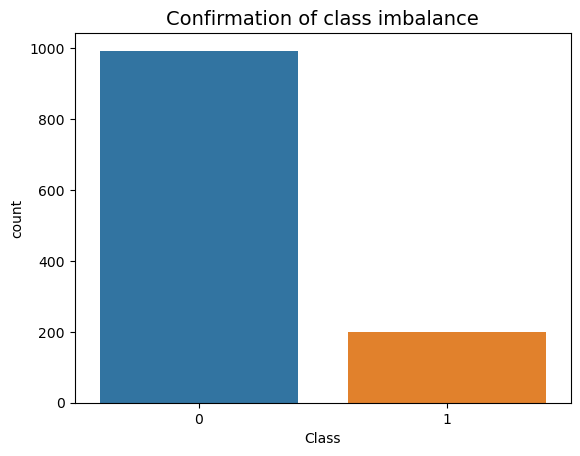

0 비율: 83.24%
1 비율: 16.76%


In [8]:
# 불균형 수치 확인 및 시각화

sns.countplot(x='Class', data = df)

plt.title('Confirmation of class imbalance', fontsize =14)
plt.show()

ratio_0 = round(len(df[df['Class']==0])/len(df)*100, 2)
ratio_1 = round(len(df[df['Class']==1])/len(df)*100, 2)
print('0 비율: {}%'.format(ratio_0))
print('1 비율: {}%'.format(ratio_1))

In [9]:
# 이상 거래 유무에 따라 그룹화 후, 건수와 평균값 도출

class_grp_count = df.drop("Time", axis=1).groupby("Class").count()
class_grp_mean = df.drop("Time", axis=1).groupby("Class").mean()
display(class_grp_count)
display(class_grp_mean)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Amount
Class,,,,,,,,,,,,,,,,,,
0,993,993,993,993,993,993,993,993,993,993,993,993,993,993,993,993,993,993
1,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Amount
Class,,,,,,,,,,,,,,,,,,
0,0.018917,-0.011237,-0.045308,0.044207,0.086018,-0.045132,0.009048,-0.014774,-0.032517,0.005167,0.038878,0.003587,0.023074,0.024501,0.017683,0.043565,0.035805,85.187613
1,-4.597659,3.299139,-6.624207,4.420185,-2.867841,-1.469696,-5.130353,0.938431,-2.501269,-5.419653,3.722054,-6.067424,-0.043141,-7.090834,0.026921,-3.971442,-6.564245,107.246700


### EDA 결과
- 결측치 확인 결과, 결측치는 존재하지 않았다.
- 타겟변수가 되는 'Class' 변수는 정수 값으로 0,1을 가지고, 이외의 변수들은 모두 실수형 자료형을 가졌다.

- 정상거래(0)와 비정상거래(1)의 수가 약 83:17의 비율로 상당히 imbalanced 된 것을 확인 할 수 있었다.
    - 이는 이상탐지 데이터이기 때문에 'fraud'인 '숫자 1 calss'가 적은 것으로 보여진다.
- 그룹화 한 건수와 평균값을 살펴봤을 때 정상거래(0)에 비해, 비정상 거래(1)에서 더 큰 금액(Amount)이 사용되는 것을 확인할 수 있었다.

## 1-2) 변수간 상관관계를 시각화하고 전처리가 필요함을 설명하라

<AxesSubplot:>

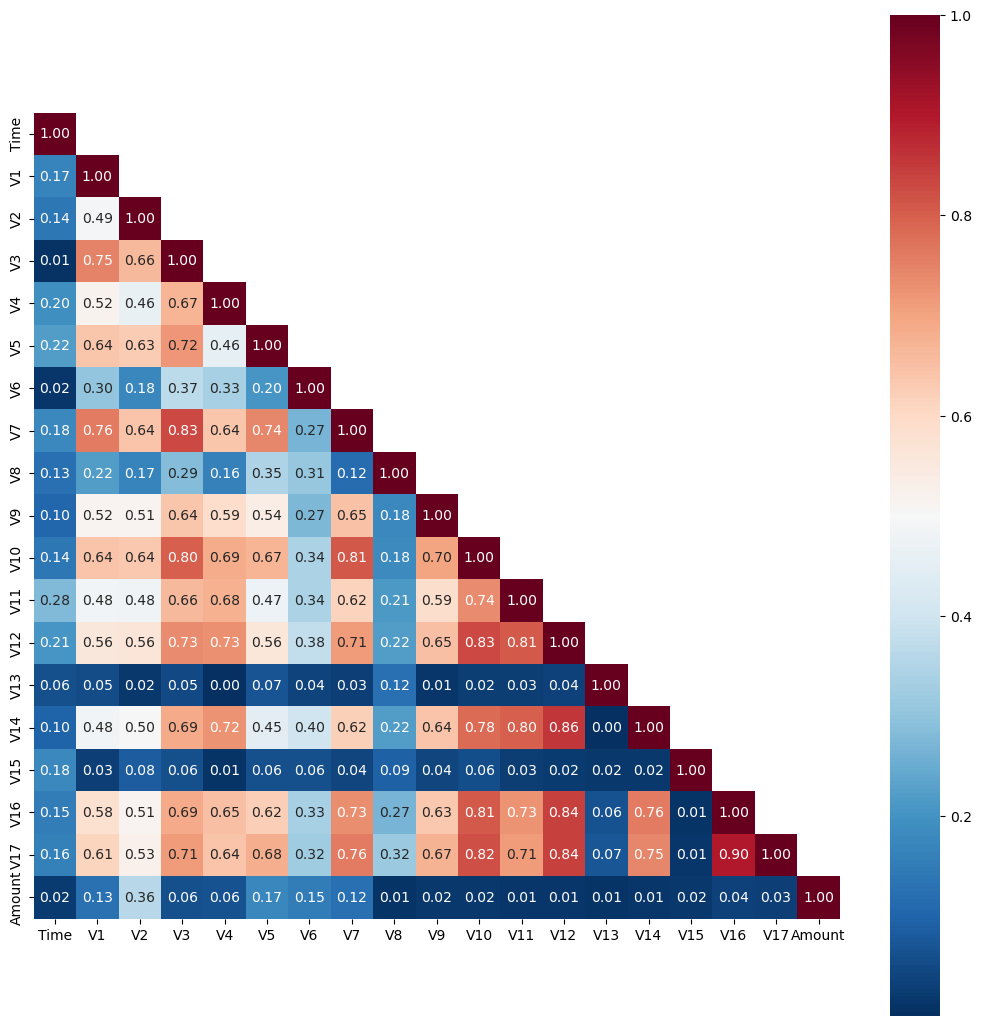

In [10]:
# 상관관계 시각화 : 히트맵
plt.figure(figsize=(13, 13))

# corr matrix 생성
corr_matrix = df.drop(['Class'], axis=1).corr().abs() # .abs() 절댓값 기준

# 상삼각행렬 반환
up_mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_)

sns.heatmap(corr_matrix, mask=up_mask, annot=True, 
            fmt='.2f', square=True, cmap='RdBu_r')

In [11]:
# corr 값이 큰 피처 관계들을 출력
corr_unstack = corr_matrix.unstack()
# 상관 계수가 1보다 작은 값들을 추출하여 내림차순으로 정렬, 상위 23개의 값을 가지는 corr 칼럼명 반환
df_cor = pd.DataFrame(corr_unstack[corr_unstack < 1].sort_values(ascending=False), 
                      columns=['corr'])[:23]
display(df_cor.style.background_gradient(cmap="RdBu_r")) # 색상 그라데이션 적용

# 상위 피처 컬럼명
# unique() 메서드를 사용하여 중복된 값을 제거
top_corr_cols = df_cor.reset_index()['level_0'].unique()
print('top_corr_cols:', top_corr_cols)

,,corr
V17,V16,0.902381
V16,V17,0.902381
V12,V14,0.855828
V14,V12,0.855828
V12,V16,0.843644
V16,V12,0.843644
V12,V17,0.840627
V17,V12,0.840627
V3,V7,0.830995
V7,V3,0.830995


top_corr_cols: ['V17' 'V16' 'V12' 'V14' 'V3' 'V7' 'V10' 'V11']


### 차원축소 필요성
- 변수들의 상관관계가 높으면 다중공선성이 발생할 가능성이 높아진다.따라서 다중공선성을 해결하기 위해 변수들을 처리하는 것이 필요하다.
- 또한 변수가 많아 차원이 높다. 그러므로 상관관계가 높은 변수들을 차원축소한 후, 새로운 종합변수를 생성하는 것이 모델 성능 향상에 기여할 수 있을 것이라 생각한다.
- 원래는 전처리 시, 다중공선성 방지를 위해 상관관계가 높은 변수들을 처리해야한다. 하지만 본 데이터는 컬럼이 무엇을 나타내는지 추정할 수 없어 변수를 어떻게 처리해야할지 결정하는 것이 어렵고, 컬럼 수가 많기 때문에 이런 상관성을 확인 후 차원축소 등의 방법을 사용해야 한다.


## 2-1) 차원축소 방법 2가지 이상 비교하고 한가지 선택 (종류와 장/단점)
### 1) PCA(주성분분석)
- PCA는 변수 간 상관관계에 기반하여 데이터의 차원을 축소하는 방법
- 장점 
    - 기존 데이터의 정보 유실 최소화, 원본 데이터의 피처 개수에 비해 매우 작은 주성분으로 원본 데이터의 총 변동성을 대부분 설명 가능
- 단점
    - 비선형적인 구조를 가진 데이터에서는 충분한 정보를 추출할 수 없고 해석이 어려울 수 있음

### 2) LDA(선형판별분석)
- 특정 공간 상에서 클래스 분리를 최대화하는 축을 찾기 위해 클래스 간 분산과 클래스 내 분산의 비율을 최대화하는 방식을 차원을 축소하는 방법
- 장점
    - 클래스를 구분하기 위한 축을 찾아내므로, 분류 문제에서 유용하게 사용
    - 데이터가 정규분포를 따르고, class가 동일한 공분산 행렬을 가지면 PCA보다 더 좋은 성능을 낼 수 있음
- 단점
    - 입력 데이터의 분포와 밀접한 관련이 있기 때문에, 데이터의 분포가 클래스 간 분산과 클래스 내 분산을 적절하게 반영하지 않는 경우에는 성능이 저하될 수 있음
    - 공분산 구조가 서로 다른 경우 사용할 수가 없음
    
### 3) t-SNE
- 방법 : t-분포를 이용해 하나의 기준점을 정하고 모든 다른 데이터와 거리를 구한 후, 그 값에 해당하는 t 분포 값을 선택하여 값이 유사한 데이터끼리 묶어줌
- 장점 : PCA와 달리, Local neighbor structure를 보존(고차원의 벡터의 유사성이 저차원에서도 유사하도록 보존)
- 단점 : 데이터의 개수가 n개라면 연산량은 n의 제곱만큼 늘어남, 매번 계산할 때마다 축의 위치가 바뀌므로, 매번 값이 바뀌기 때문에 모델의 학습 feature로 사용 되기에는 다소 어려움

## 2-2) 추천한 한 가지를 실제로 수행하고 선택한 이유 설명

### PCA 선택
- t-SNE는 연산량이 많고, PCA는 고차원 데이터를 저차원으로 변환하는 데 효과적이고 계산 비용이 적게 든다.
- LDA의 새로운 좌표축의 개수는 입력 데이터의 클래스 수(이진 분류에서는 2)보다 작다. 
    - 따라서 LDA을 통해 차원을 1개로 줄이면 손실되는 데이터가 너무 많아진다.
- 따라서 데이터 손실률이 가장 적고, 분류모델 전처리에 널리 쓰이는 PCA를 선정하여 수행한다.

### 연속형 변수 스케일링
- Time, Amount 변수는 다른 수치형 변수들과 mean, max, min 등 차이가 크게 나서 스케일링이 필요하다고 판단하여, 스케일링을 진행
- 주성분 분석(PCA)이나 클러스터링과 같은 알고리즘을 사용하여 변수들을 시각화할 때, 스케일링을 진행하면 결과가 더욱 해석 가능하고 안정적

#### PCA를 수행하기 전, 변수 간 스케일의 차이가 주성분 선정에 영향을 주는 것을 방지하기 위해 스케일링 진행
#### 스케일링 하지 않으면, 값이 큰 feature가 더 중요한 feature로 판단될 수 있음)

In [12]:
# 피쳐와 종속변수 할당

X = df.drop(['Class'], axis=1)
y = df['Class']

display(X.head(3))

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Amount
0,60.0,1.069141,0.043786,0.309867,1.316694,-0.462394,-0.857888,0.207904,-0.191270,0.056398,0.041567,-0.507358,-0.108666,-0.473257,0.452046,1.005675,0.185441,-0.439976,89.40
1,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,0.00
2,426.0,-1.932055,1.724618,1.288229,-0.396998,-0.140202,2.470521,-1.865298,-5.186855,0.794764,0.155379,0.034517,0.906738,-0.027172,-0.404303,-0.473949,0.274034,-0.222340,16.19


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Amount
0,-1.910236,0.503810,-0.187750,0.373186,0.229840,-0.019702,-0.380859,0.312343,-0.136123,0.302269,0.325996,-0.594823,0.302295,-0.479024,0.501785,1.086837,0.359263,0.165482,0.002337
1,-1.903009,-0.430077,0.528863,-0.118149,1.373417,-0.041840,-0.758217,-0.496251,0.504602,-1.396977,-0.643828,1.301226,-0.629523,-0.599428,-0.966447,0.408199,-0.225360,-0.461643,-0.403936
2,-1.902592,-0.325079,0.443474,0.623589,-0.501076,0.099587,1.827850,-0.298295,-2.158200,0.746165,0.365223,-0.317845,0.641274,-0.038644,0.236600,-0.543375,0.398318,0.222587,-0.330361
3,-1.901631,-0.632056,-1.389898,0.572460,0.644391,0.654951,-0.518180,0.347001,-0.086144,0.105471,0.022640,-0.547398,0.170605,0.656027,-0.162168,2.183059,0.571452,0.438284,2.000074
4,-1.897412,0.009932,0.035761,0.469539,-0.341662,1.009673,2.757848,0.158976,0.382410,-0.090500,0.309553,-0.459637,0.210215,0.095864,0.419883,1.987865,0.398455,0.097851,-0.303958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,1.686680,0.727802,-0.386473,0.318436,-0.129882,-0.321536,-0.583829,0.094795,-0.134832,1.074512,0.228055,-0.351935,0.735515,0.756261,0.260300,0.366076,0.183432,0.234518,-0.244880
1189,1.687140,0.788667,-0.209684,-0.116169,-0.253130,0.293382,-0.321460,0.312203,-0.179756,0.619866,0.312722,-0.829227,0.413767,0.259645,0.494449,0.852673,0.231283,0.111134,-0.383531
1190,1.687996,0.782593,-0.624721,0.207292,-0.642252,-0.341105,-0.256006,-0.063678,-0.109518,0.383376,0.555018,-0.721309,0.241127,0.595274,0.165329,0.273872,0.783714,0.314287,-0.189347
1191,1.692383,-1.399860,-0.079089,0.106338,-0.003284,-1.250189,1.598370,-0.418330,1.113601,0.600659,0.695315,-1.130171,0.733527,0.271615,0.354390,-2.004647,-0.177623,0.536800,0.277730


In [14]:
from sklearn.decomposition import PCA

# PCA 수행
pca = PCA(n_components=10)
data_pca_X = pca.fit_transform(X_scaled)

In [15]:
pca_result = pd.DataFrame({'설명가능한 분산 비율(고윳값)': pca.explained_variance_,
                           '기여율': pca.explained_variance_ratio_},
                           index = np.array([f'pca{num + 1}' for num in range(10)])
                          )
pca_result['누적기여율'] = pca_result['기여율'].cumsum()
pca_result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,9.290528,0.488565,0.488565
pca2,1.307902,0.068779,0.557345
pca3,1.281768,0.067405,0.624749
pca4,1.154049,0.060688,0.685438
pca5,1.121474,0.058975,0.744413
pca6,0.945748,0.049735,0.794148
pca7,0.796343,0.041878,0.836026
pca8,0.667092,0.035081,0.871106
pca9,0.460198,0.024201,0.895307
pca10,0.431816,0.022708,0.918015


<Figure size 700x400 with 0 Axes>

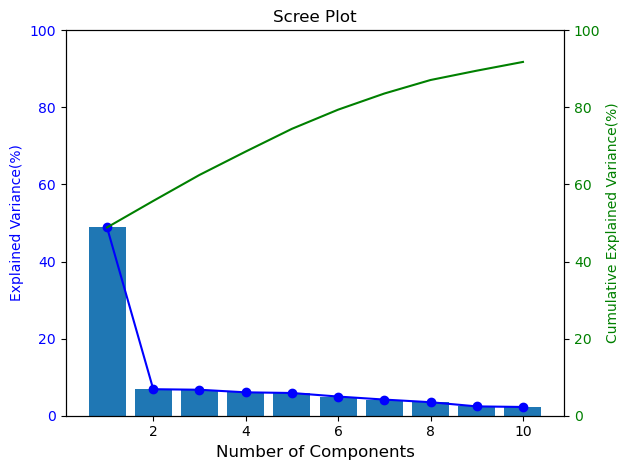

In [16]:
plt.figure(figsize=(7,4))

# left side
fig, ax1 = plt.subplots()
ax1.set_title('Scree Plot', fontsize=12)
ax1.set_xlabel('Number of Components', fontsize=12)
ax1.set_ylabel('Explained Variance(%)', color='b', fontsize=10)
ax1.bar(range(1,11,1), pca_result['기여율']*100)
ax1.plot(range(1,11,1), pca_result['기여율']*100, 'b-o')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_ylim(0, 100)

# right side with different scale
ax2 = ax1.twinx()
ax2.set_ylabel('Cumulative Explained Variance(%)', color='g', fontsize=10)
ax2.plot(range(1,11,1), pca_result['누적기여율']*100, 'g')
ax2.tick_params(axis='y', labelcolor='g')
ax2.set_ylim(0, 100)

fig.tight_layout()
plt.show()

### 7개의 주성분으로 PCA 진행
- Scree Plot을 통해, 고유값 변화율이 완만해지는 부분인 3개의 주성분이 적절해 보일 수 있으나 분산 설명력이 너무 적어 모델 성능에 부정적인 영향을 끼칠 수 있다.
    - 누적 기여율 : 주성분 분석에서 각 주성분이 설명하는 분산의 비율을 누적하여 계산
    - 누적된 분산 설명이 0.7 ~ 0.9 일 때 주성분의 개수가 적절하다고 판단할 수 있다. 
- 따라서 분산의 설명력이 80% 이상인 7개의 주성분으로 차원축소하는 게 적절하다고 판단하였다. 19개의 변수에서 7개의 변수로 축소시켰으므로 차원축소 관점에서 의미가 있다고 볼 수 있다.


In [17]:
# 7개 주성분으로 PCA 수행
pca = PCA(n_components=7)
data_pca_X = pca.fit_transform(X_scaled)

In [18]:
# # 다른 코드 이렇게도 구현하구나 참고

# # PCA 모델 생성
# pca = PCA() # 먼저 모든 주성분 추출

# # PCA 모델 fitting
# pca.fit(X_scaled)

# explained_variances = pca.explained_variance_ratio_
# cumulative_variances = np.cumsum(explained_variances)

# # 누적된 설명 분산이 70% 이상이 되는, 적절한 주성분 개수 찾기
# # 0.9 이상이면 12개가 가장 적절한 것으로 파악됨
# n_components_70 = np.argmax(cumulative_variances >= 0.7) + 1

# print("설명 분산:", explained_variances, "\n")
# print("누적된 설명 분산:", cumulative_variances, "\n") 
# print("누적 설명 분산 0.7 이상, 적절한 주성분 개수:", n_components_70)

# n_components_90 = np.argmax(cumulative_variances >= 0.9) + 1
# print("누적 설명 분산 0.9 이상, 적절한 주성분 개수:", n_components_90)

# plt.plot(cumulative_variances)
# plt.xlabel('Number of Components')
# plt.ylabel('Cumulative Explained Variance')
# plt.show()

---

## 3-1) 오버샘플링과 언더샘플링 장단점 비교 및 선택 구현

### 오버샘플링
- 적은 레이블을 가진 데이터 세트를 많은 레이블을 가진 데이터 세트 수준으로 증식하여 데이터 불균형을 극복하는 방식
- 불균형 데이터셋에서 분류 모델의 성능을 향상시키기 위한 오버 샘플링 방법을 이용

#### 1) Random Oversampling
- 기존에 존재하는 소수의 클래스를 단순 복제하여 클래스가 불균형하지 않도록 비율을 맞춰주는 방법
- 장점
    - 쉽게 구현할 수 있다.
    - 다른 오버샘플링 기법들과 비교해서 빠른 속도로 학습이 가능하다.
- 단점
    - 동일한 소수 클래스 데이터가 단순 복제되기 때문에, 과적합 문제가 발생할 수 있다.

#### 2) SMOTE

- 적은 데이터 세트에 있는 개별 데이터들의 K 최근접 이웃을 찾아서, 해당 데이터와 K개의 이웃들의 차이를 일정 값으로 만들어서 기존 데이터와 약간 차이가 나는 새로운 데이터들을 생성하는 방식
- 장점
    - 소수 클래스의 데이터를 단순히 복제하는 것이 아니라, 소수 클래스 데이터의 변형을 적용하므로 과적합 문제가 적음
- 단점
    - Resampling 방식보다 처리속도가 느릴 수 있다.
    - 고차원 데이터에는 문제가 발생할 수 있다.

### 언더 샘플링
- 많은 레이블을 가진 데이터 세트를 적은 레이블을 가진 데이터 세트 수준으로 감소
- 다수 클래스에 속하는 데이터의 관측치를 감소시켜, 소수 클래수 개수에 맞추는 방식
- 종류
    - 1) Random Undersampling : 다수 클래스에 속해 있는 관측치들 중 무작위로 샘플링하는 기법. 수행 마다 다른 결과 도출
    - 2) Tomek Links : 서로 다른 클래스의 두 점을 연결한 후 토멕링크에 해당하는 데이터 쌍들 중 다수 클래스의 데이터를 삭제

### 오버 샘플링 선택
- Class 값의 분포를 살펴봤을 때 정상 거래와 이상 거래의 비율이 약 83:17이었던 것을 확인할 수 있다.
- 언더샘플링할 경우 정상거래 데이터(class=0)가 약 1000개 가량 사라지기 때문에, 데이터 손실의 문제로 인해 예측 성능이 저하될 수 있다.
- 따라서, 오버샘플링이 분석에 더 적절할 것으로 파악하여 구현한다.

## 3-2) 구현 및 알고리즘 2가지 이상 비교, 성능 측정

In [19]:
# 먼저 train과 test 데이터 분리 후, trian 데이터에만 오버샘플링 진행

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    random_state = 2023,
                                                    test_size=0.3)

In [20]:
X_train.shape, X_test.shape

((835, 19), (358, 19))

In [21]:
print('Original Data')
print(y_train.value_counts()) # .value_counts(normalize=True)는 비율로 출력

Original Data
0    705
1    130
Name: Class, dtype: int64


In [22]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
import time

start = time.time()

# 랜덤오버샘플링
X_ROS, y_ROS = RandomOverSampler(random_state=2023).fit_resample(X_train, y_train)
print('After Random Over Sampling')
print(y_ROS.value_counts())

end = time.time()
print()
print("랜덤오버샘플링 수행시간 : {:.3f}초".format(end-start))

After Random Over Sampling
0    705
1    705
Name: Class, dtype: int64

랜덤오버샘플링 수행시간 : 0.019초


In [23]:
# SMOTE
start = time.time()

X_SMO, y_SMO = SMOTE(random_state=2023).fit_resample(X_train,y_train)
print('After SMOTE')
print(y_SMO.value_counts())

end = time.time()
print()
print("SMOTE 수행시간 : {:.3f}초".format(end-start))

After SMOTE
0    705
1    705
Name: Class, dtype: int64

SMOTE 수행시간 : 0.021초


### 원데이터, 오버샘플링 시각화

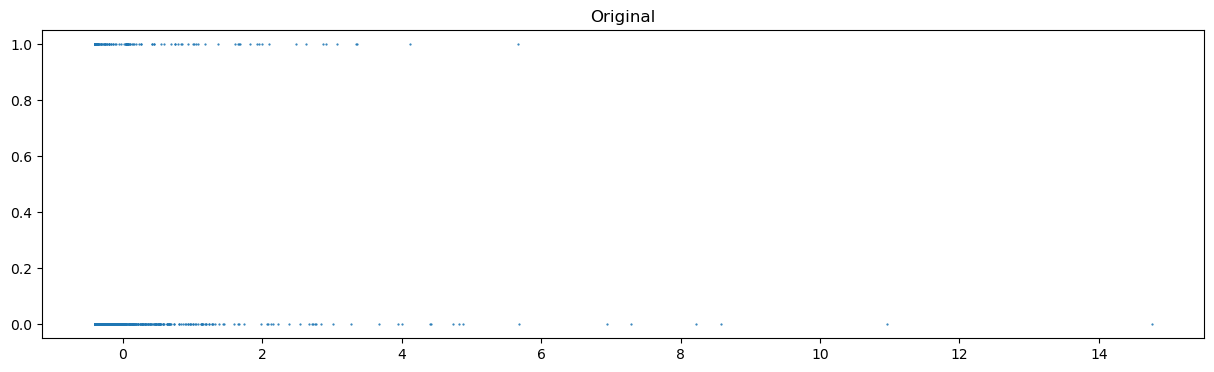

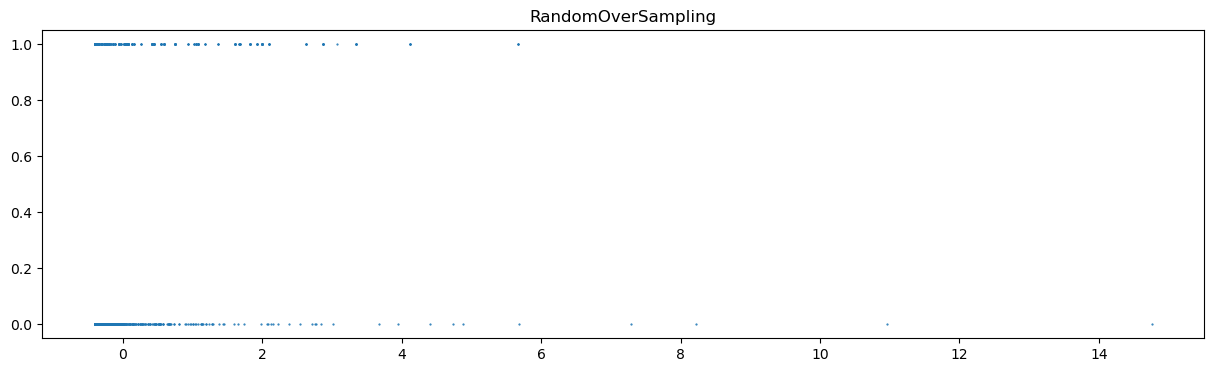

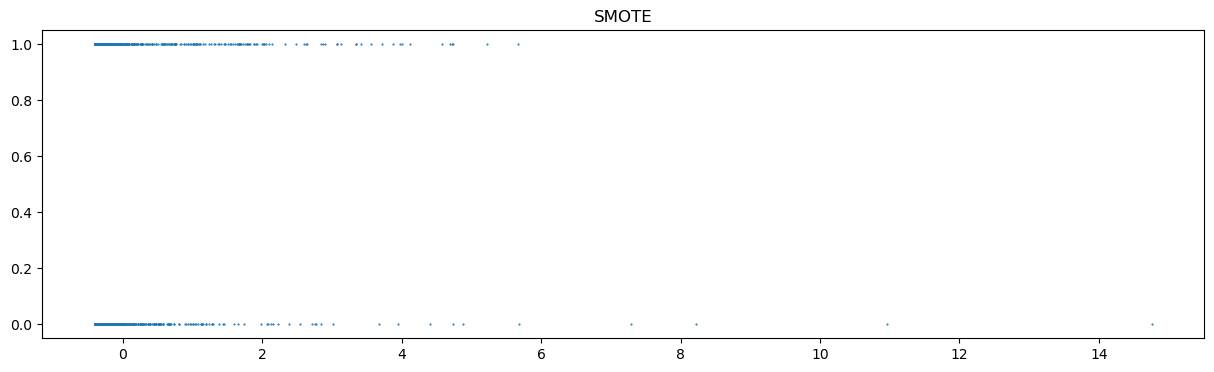

In [24]:
# df_ROS = pd.concat([x_train_random, y_train_random], axis=1)
# df_SMO = pd.concat([x_train_smote, y_train_smote], axis=1)

plt.figure(figsize=(15, 4))
plt.title('Original')
plt.scatter(X_scaled['Amount'], df['Class'], s=0.3)
plt.show()

plt.figure(figsize=(15,4))
plt.title('RandomOverSampling')
plt.scatter(X_ROS['Amount'], y_ROS, s=0.3)
plt.show()

plt.figure(figsize=(15,4))
plt.title('SMOTE')
plt.scatter(X_SMO['Amount'], y_SMO, s=0.3)
plt.show()

#### 이상거래 클래스(class=1)의 수가 정상거래보다 굉장히 적다는 점을 고려해, 기존 데이터를 단순히 복제하는 Random Oversampling은 과적합 문제가 우려
#### 따라서 단순히 복제하는 것이 아니라, 소수 클래스 데이터의 변형을 적용해 새로운 데이터를 생성하여 과적합 문제가 적은 SMOTE 방법을 선정한다.

## 3-3) 현재까지 전처리한 데이터를 통해 모델 수행 후 결과 분석
- SMOTE 샘플링을 적용한 train 데이터, 그리고 Test 데이터를 이용

```
1. Logistic Regression
2. SVM
3. Naive Bayes (여기서는 Gaussian 써야 함)
  - Bernoulli Naive Bayes: class가 2개 + feature가 오직 이산형으로 이루어져 있을 때 사용       => BernoulliNB() 
  - Multinomial Naive Bayes: class 3개 이상 + feature가 오직 이산형으로 이루어져 있을 때 사용   => MultinomialNB()
  - Gaussian Naive Bayes: feature가 오직 연속형으로 이루어져 있을 때 사용                     => GaussianNB()
4. RandomForest
5. Xgboost
6. LightGBM
7. CatBoost (CatBoost는 범주형 변수가 많을 때 사용해야 하므로, 여기선 사용하지 않음)
```

In [25]:
# # 다른 모델들 참고. 본 문제에서는 svm, 나이브 베이즈, lgbm만 비교
# # 모델 클래스만 바뀌고 다른 건 형식 동일하니까 입맛에 맞춰서 적용

# # 로지스틱 회귀
# from sklearn.linear_model import LogisticRegression

# # 학습
# clf_logit = LogisticRegression(random_state=2023)
# clf_logit.fit(X_train, y_train)

# # 예측 및 예측확률
# clf_logit_pred = clf_logit.predict(X_test)
# clf_logit_pred_prob = clf_logit.predict_proba(X_test)





# # 랜덤 포레스트
# from sklearn.ensemble import RandomForestClassifier


# # 학습
# clf_rf = RandomForestClassifier(n_estimators=100,      # tree 개수
#                                 min_samples_split=5,   # 분류되는 tree 최소 샘플 수
#                                 random_state=2023) 
# clf_rf.fit(X_train, y_train)

# # 예측 및 예측확률
# clf_rf_pred = clf_rf.predict(X_test)
# clf_rf_pred_prob = clf_rf.predict_proba(X_test)





# # xgboost
# from xgboost import XGBClassifier


# # 학습
# # lgbm이랑 옵션 유사
# clf_xgb = XGBClassifier(n_estimators=400,
#                         learning_rate = 0.1,
#                         random_state=2023)
# clf_xgb.fit(X_train, y_train)

# # 예측 및 예측확률
# clf_xgb_pred = clf_xgb.predict(X_test)
# clf_xgb_pred_prob = clf_xgb.predict_proba(X_test)

### SVM, Naive Bayes, LightGBM 사용

In [26]:
# 모델 평가
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, classification_report

from sklearn.metrics import auc, roc_auc_score          # AUC 값 계산법 2가지
from sklearn.metrics import roc_curve, RocCurveDisplay  # ROC-AUC 그래프 그리는 방법 2가지

### SVM
- confusion matrix 히트맵 시각화 참고

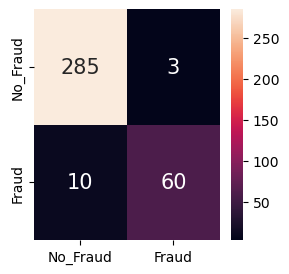

정확도:  96.37%
정밀도:  95.24%
재현율:  85.71%
F1-score:  90.23%
AUC:  98.11%


In [27]:
import sklearn.svm as svm

# 학습
# C: 정규화 강도를 나타내는 파라미터. 클수록 정규화 강도가 낮음(반비례)
SVM = svm.SVC(C = 0.5, probability=True, random_state=2023) 
SVM.fit(X_SMO, y_SMO)

# 예측 및 예측확률
SVM_pred = SVM.predict(X_test)
SVM_pred_prob = SVM.predict_proba(X_test)

# 평가
# Confusion Matrix
plt.figure(figsize=(3,3))
SVM_con_mat = pd.DataFrame(confusion_matrix(y_test, SVM_pred),
                                 columns=['No_Fraud','Fraud'],
                                 index=['No_Fraud', 'Fraud'])
sns.heatmap(SVM_con_mat,
            annot=True,
            annot_kws={'size': 15},
            fmt="d")

plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.show()

# 정확도
SVM_acc = accuracy_score(y_test, SVM_pred)

# 정밀도(Precision): 모델이 True라고 분류한 것 중에서 실제 True인 것의 비율
SVM_prc = precision_score(y_test, SVM_pred) 

# 재현율(Recall = Sensitivity): 실제 True인 것 중에서 모델이 True라고 예측한 것의 비율
SVM_rcll = recall_score(y_test, SVM_pred)

# f1-Score
# 범주가 3개 이상 + balanced: average = macro
# 범주가 3개 이상 + imbalanced: average = micro
SVM_f1_score = f1_score(y_test, SVM_pred)  # print(f'F1 스코어: {f1:.4f}'

# ROC-AUC
SVM_auc = roc_auc_score(y_test, SVM_pred_prob[:,1])
        
print('정확도:  {}%'.format(round(SVM_acc*100, 2)))
print('정밀도:  {}%'.format(round(SVM_prc*100, 2)))
print('재현율:  {}%'.format(round(SVM_rcll*100, 2)))
print('F1-score:  {}%'.format(round(SVM_f1_score*100, 2)))
print('AUC:  {}%'.format(round(SVM_auc*100, 2)))

### 나이브 베이즈

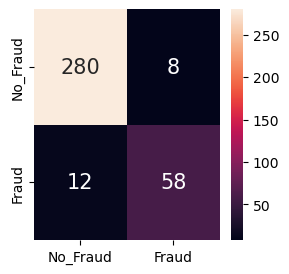

정확도:  94.41%
정밀도:  87.88%
재현율:  82.86%
F1-score:  85.29%
AUC:  96.68%


In [28]:
from sklearn.naive_bayes import GaussianNB


# 학습
clf_gnb = GaussianNB()
clf_gnb.fit(X_SMO, y_SMO)

# 예측 및 예측확률
clf_gnb_pred = clf_gnb.predict(X_test)
clf_gnb_pred_prob = clf_gnb.predict_proba(X_test)

# 평가
## Confusion Matrix
plt.figure(figsize=(3,3))
clf_gnb_con_mat = pd.DataFrame(confusion_matrix(y_test ,clf_gnb_pred),
                                 columns=['No_Fraud','Fraud'],
                                 index=['No_Fraud', 'Fraud'])

sns.heatmap(clf_gnb_con_mat,
            annot=True,
            annot_kws={'size': 15},
            fmt="d")

plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.show()

## 정확도
clf_gnb_acc = accuracy_score(y_test, clf_gnb_pred)

## 정밀도(Precision): 모델이 True라고 분류한 것 중에서 실제 True인 것의 비율
clf_gnb_prc = precision_score(y_test, clf_gnb_pred) 

## 재현율(Recall = Sensitivity): 실제 True인 것 중에서 모델이 True라고 예측한 것의 비율
clf_gnb_rcll = recall_score(y_test, clf_gnb_pred)

## f1-Score
clf_gnb_f1_score = f1_score(y_test,
                            clf_gnb_pred,
                            average='binary')  # print(f'F1 스코어: {f1:.4f}'
                                               # 범주가 3개 이상 + balanced: average = macro
                                               # 범주가 3개 이상 + imbalanced: average = micro

# ROC-AUC
clf_gnb_auc = roc_auc_score(y_test, clf_gnb_pred_prob[:,1])
        
print('정확도:  {}%'.format(round( clf_gnb_acc*100, 2)))
print('정밀도:  {}%'.format(round( clf_gnb_prc*100, 2)))
print('재현율:  {}%'.format(round( clf_gnb_rcll*100, 2)))
print('F1-score:  {}%'.format(round( clf_gnb_f1_score*100, 2)))
print('AUC:  {}%'.format(round( clf_gnb_auc*100, 2)))

### LightGBM
- 28회 기출에 간단버전 있음

lGBM 옵션 자세히

```python
# 과적합 방지 파라미터 조정: max_depth, min_child_weight, reg_lambda, reg_alpha

min_child_weight = 0.7, # 트리에서 추가적으로 가지를 나눌지 결정하기 위해 필요한 데이터들의 가중치 총합. 값이 클수록 분할을 자제.
reg_lambda=0.7,         # L2 Regularization 적용 값으로 피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합 감소 효과
reg_alpha=0.7)         # L1 Regularization 적용 값으로 피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합 감소 효과
```


```python
# 학습
lgbm = LGBMClassifier(n_estimators=400,
                        learning_rate = 0.1,
                        random_state=2023,
                        # 과적합 방지 파라미터 조정: max_depth, min_child_weight, reg_lambda, reg_alpha
                        max_depth = 3,          # 트리 깊이 제한
                        min_child_weight =0.7,  
                        reg_lambda=0.7,   # L2 Regularization 적용 값. 피처 개수가 많을 경우 적용을 검토, 값이 클수록 과적합 감소
                        reg_alpha=0.7)          # L1 Regularization 적용 값. 위와 동일

lgbm.fit(X_train, y_train,
            eval_metric = "logloss",      # 모델 평가 지표
            early_stopping_rounds = 100,  # 지정한 metric(평가지표)가 100번 동안 개선 되지 않으면 학습을 멈춤
            eval_set = evals,             # evals = [ (X_test, y_test) ] => 평가 데이터
            verbose=True)
```

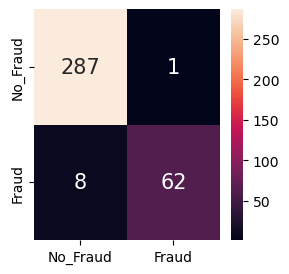

정확도:  97.49%
정밀도:  98.41%
재현율:  88.57%
F1-score:  93.23%
AUC:  97.79%


In [29]:
from lightgbm import LGBMClassifier


# 학습
lgbm = LGBMClassifier(n_estimators=400,
                        learning_rate = 0.1,
                        random_state=2023)
#                         max_depth = 3,        
#                         min_child_weight =0.7,  
#                         reg_lambda=0.7,        
#                         reg_alpha=0.7)        

lgbm.fit(X_SMO, y_SMO)
#             eval_metric = "logloss",      
#             early_stopping_rounds = 100, 
#             eval_set = evals,             
#             verbose=True)

# 예측 및 예측확률
lgbm_pred = lgbm.predict(X_test)
lgbm_pred_prob = lgbm.predict_proba(X_test)



# 평가
## Confusion Matrix
plt.figure(figsize=(3,3))
lgbm_con_mat = pd.DataFrame(confusion_matrix(y_test, lgbm_pred),
                                 columns=['No_Fraud','Fraud'],
                                 index=['No_Fraud', 'Fraud'])

sns.heatmap(lgbm_con_mat,
            annot=True,
            annot_kws={'size': 15},
            fmt="d")

plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.show()

#정확도
lgbm_acc = accuracy_score(y_test, lgbm_pred)

# 정밀도(Precision): 모델이 True라고 분류한 것 중에서 실제 True인 것의 비율
lgbm_prc = precision_score(y_test, lgbm_pred) 

## 재현율(Recall = Sensitivity): 실제 True인 것 중에서 모델이 True라고 예측한 것의 비율
lgbm_rcll = recall_score(y_test, lgbm_pred)

# f1-Score
lgbm_f1_score = f1_score(y_test, lgbm_pred, average='binary')

# ROC-AUC
lgbm_auc = roc_auc_score(y_test, lgbm_pred_prob[:,1])

print('정확도:  {}%'.format(round(lgbm_acc*100, 2)))
print('정밀도:  {}%'.format(round(lgbm_prc*100, 2)))
print('재현율:  {}%'.format(round(lgbm_rcll*100, 2)))
print('F1-score:  {}%'.format(round(lgbm_f1_score*100, 2)))
print('AUC:  {}%'.format(round(lgbm_auc*100, 2)))

### 모델 비교

In [30]:
eval_data = {'정확도':[SVM_acc, clf_gnb_acc, lgbm_acc],
             
             '정밀도':[SVM_prc, clf_gnb_prc, lgbm_prc],
             
             '재현율':[SVM_rcll, clf_gnb_rcll, lgbm_rcll],
             
             'F1':[SVM_f1_score, clf_gnb_f1_score, lgbm_f1_score],
             
             'AUC':[SVM_auc, clf_gnb_auc, lgbm_auc]}

index = [ 'svm', 'Gaussian Naive Bayes', 'LightGBM']

eval_model_perform = pd.DataFrame(eval_data, index)
eval_model_perform

,정확도,정밀도,재현율,F1,AUC
svm,0.963687,0.952381,0.857143,0.902256,0.981101
Gaussian Naive Bayes,0.944134,0.878788,0.828571,0.852941,0.966815
LightGBM,0.974860,0.984127,0.885714,0.932331,0.977927


- 정확도(Accuracy): 모델이 정확하게 예측한 비율로, 높을수록 좋음
- 정밀도(Precision): 모델이 Positive로 예측한 것 중에서 실제 Positive인 비율로, 높을수록 좋습니다.
- 재현율(Recall): 실제 Positive 중에서 모델이 정확하게 예측한 비율로, 높을수록 좋습니다.
- F1 스코어: 정밀도와 재현율의 조화 평균으로, 높을수록 좋습니다.
- AUC (Area Under the Curve): ROC 곡선 아래의 면적으로, 높을수록 좋습니다.

#### 위 성능 비교를 통해, 다양한 지표에서 LightGBM 모델이 가장 우수한 성능을 보이고 있다.
#### LightGBM는 정확도, 정밀도, F1 스코어, AUC 모두에서 다른 두 모델에 비해 높은 값을 가지고 있다.
- SVM은 재현율에서 다른 두 모델보다 우수한 성능을 보이고 있습니다. 
- Gaussian Naive Bayes는 다른 두 모델에 비해 모든 지표에서 낮은 값을 가지고 있습니다. 

#### 따라서, LightGBM 모델이 종합적으로 가장 우수한 성능을 보이고 있는 것으로 판단된다.

### 참고 : ROC-CURVE  그리기
- ROC 곡선은 (0,0)에서 (1,1)까지의 직선으로부터 멀리 떨어질수록 좋은 성능을 나타냄

#### 방법 1 : roc_curve 함수 이용

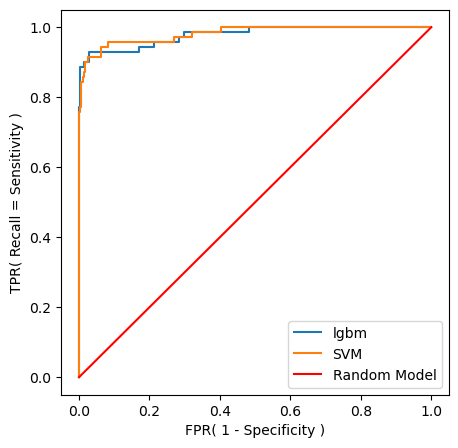

In [31]:
## Positive 클래스에 대한 확률값 계산 
score1 = lgbm_pred_prob[:,1]
score2 = SVM_pred_prob[:, 1]
 
## False Positive Rate, True Positive Rate, 절단값 리턴
fpr1, tpr1, cut1 = roc_curve(y_test, score1)
fpr2, tpr2, cut2 = roc_curve(y_test, score2)
 
## ROC 곡선 그리기
fig = plt.figure(figsize=(5,5))
fig.set_facecolor('white')
ax = fig.add_subplot()

ax.plot(fpr1, tpr1, label='lgbm')
ax.plot(fpr2, tpr2, label='SVM')

# (0,0)에서 (1,1)까지의 직선과 roc curve를 비교
ax.plot([0, 1], [0, 1], color='red', label='Random Model')

# negative 들 중에 positive라고 잘못 예측한 비율 = FP / (TN + FP)
plt.xlabel('FPR( 1 - Specificity )')  

# positive 들 중에 positive라고 잘 예측한 비율 = TP / (FN + TP)
plt.ylabel('TPR( Recall = Sensitivity )') 

ax.legend( fontsize=10)
plt.show()

#### 방법2 : RocCurveDisplay 이용

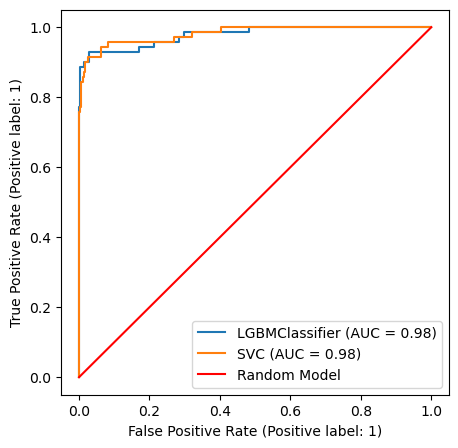

In [32]:
fig = plt.figure(figsize=(5,5))
fig.set_facecolor('white')

ax = fig.add_subplot()
RocCurveDisplay.from_estimator(lgbm, X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(SVM, X_test, y_test, ax=ax)
ax.plot([0, 1], [0, 1], color='red', label='Random Model')

ax.legend(fontsize=10)
plt.show()

### 참고 : AUC 계산방법
- AUC : ROC Curve 아래 면적
    - 분류 성능이 좋을수록 1에 가까움
    - 분류가 무작위면 0.5에 가까움
    - 분류를 완전 반대로 하면 0이 됨

In [33]:
# AUC 방법 1 : roc_auc_score 함수 사용

## Positive 확률값 계산
score1 = lgbm_pred_prob[:,1]
score2 = SVM_pred_prob[:, 1]

print('roc_auc_score')
print('lgbm', roc_auc_score(y_test, score1))
print('svm', roc_auc_score(y_test, score2))
print()



# # AUC 방법 2 : roc_curve, auc 함수 사용

# ## Positive 확률값 계산
# score1 = lgbm_pred_prob[:,1]
# score2 = SVM_pred_prob[:, 1]

# ## False Positive Rate, True Positive Rate, 절단값 리턴
# fpr1, tpr1, cut1 = roc_curve(y_test, score1)
# fpr2, tpr2, cut2 = roc_curve(y_test, score2)

# print('auc')
# print('logit', auc(fpr1, tpr1))
# print('svm', auc(fpr2, tpr2))

roc_auc_score
lgbm 0.9779265873015874
svm 0.9811011904761905



---

## 4-1) 이상탐지 모델 2가지 이상 기술, 장/단점 설명

### 1) DBSCAN (밀도 기반의 이상탐지 기법)
- 방법
    - 어떤 데이터 포인트에서의 x 반지름 내에 n개 이상의 포인트를 갖는 것을 하나의 군집으로 구분한다.
    - 그래서 k-means와 달리 군집개수를 미리 정하지 않아도 되지만, '반지름 x'와 '한 군집 내에 최소 n개 포인트'를 사전에 정의 해야한다.
- 장점
    - 클러스터 개수 정의 불필요
- 단점
    - 다른 밀도 분포를 가진 데이터는 군집 분석의 성능이 떨어진다.
    - 데이터의 차원이 커질수록 성능이 떨어진다.
    

### 2)  Isolation Forest (밀도 기반의 이상탐지 기법)
- 기능과 분할 값을 무작위로 선택하여 데이터를 더 작은 하위 집합으로 분할하는 트리기반 모델
- 그 후 관찰을 얼마나 빨리 격리할수 있는지에 따라 이상 점수를 할당함
- 데이터 셋을 의사결정나무 형태로 표현
    - 정상값을 분리하기 위해서 의사결정나무를 깊숙하게 내려가고, 이상값은 의사결정나무 상단부에서 분리할 수 있음을 이용
    - 이상치는 정상 데이터보다 분리하기가 쉬워 경로가 더 짧게 계산
    - 이 특성을 사용해 의사결정나무를 몇 회 타고 내려가야 분리 되는가를 기준으로 정상과 이상을 분리
<br></br>
- 장점
    - 군집기반 이상탐지 알고리즘에 비해 계산량이 매우 적다.
    - 고차원 데이터 셋에서 효율적
    - 데이터 분포에 대한 사전 지식이나 가정이 필요하지 않음
- 단점
    - 데이터가 고도로 구조화된 경우에는 효과적이지 않음
    - 다중 모달 데이터로 어려움을 겪을 수 있음
    - 데이터의 차원이 커질수록 성능이 떨어진다.
   

### 3) One-class SVM
- 설명 : 데이터를 원점과 분리하기 위해 데이터를 더 높은 차원의 공간에 매핑하는 커널 기반 모델임. 그런 다음 이상값을 결정 경계에서 가장 멀리 떨어진 관측값으로 식별
- 장점
    - 고차원 데이터에서 이상값을 식별하는데 효과적
    - 비선형 구조의 데이터 세트에서 잘 작동
    - 글로벌 및 로컬 이상값을 모두 처리할 수 있음
- 단점
    - 효과적으로 작동하려면 하이퍼파라미터 조정이 필요할 수 있음
    - 커널 공간에서 데이터를 분리할 수 없는 경우 성능이 좋지 않을 수 있음
    - 대규모 데이터 세트에서는 계산 비용이 많이 들 수 있음
    
 
### 4) LOF(Local Outlier Factor)
- 설명 : 각 관측치의 로컬 밀도를 계산하고 이를 이웃 항목과 비교하여 이상값을 식별하는 밀도 기반 모델
- 장점
    - 고차원 데이터에서 이상값을 식별하는 데 효과적
    - 복잡한 구조의 데이터 세트에서 잘 작동
    - 글로벌 및 로컬 이상값을 모두 처리할 수 있음
- 단점
    - 이웃 수와 사용된 거리 메트릭에 민감함
    - 대규모 데이터 세트에서는 계산 비용이 많이 들 수 있음
    - 편향된 분포를 가진 데이터 세트에서 잘못된 긍정을 생성할 수 있음
    
#### 참고 : 위에서 언급한 대부분 알고리즘이 비지도 학습의 군집에 속함
- DBSCAN
- one-class SVM
- 아이솔레이션 포레스트(isolation forest)

## 4-2) 2번에서 만든 데이터로 한 가지 이상탐지 모델을 구현하고, 3번에서 만든 모델과 비교
- 2번 : 차원축소

### 아이솔레이션 포레스트를 이용한 이상탐지 모델 구현

In [34]:
# IF의 predict는 이상치를 -1, 정상값을 1로 반환하므로
# y와 동일하게 정상값 0, 이상값 1로 변경

def label_mapping(x) :
    if x == 1 : # 정상값 1을 0으로
        return 0
    elif x== -1 : # 이상치 -1를 1로
        return 1
    else :
        return x

In [35]:
# 데이터 분리

from sklearn.ensemble import IsolationForest

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(data_pca_X,
                                                                    y,
                                                                    stratify=y,
                                                                    test_size=0.3,
                                                                    random_state=2023)

In [36]:
X_train_pca.shape, X_test_pca.shape

((835, 7), (358, 7))

IF 모델 contamination 값 설정
- 일반적으로 0에서 0.5 사이의 값을 가지며, 기본값은 0.1
- 데이터에 따라 다르며, 이상치의 실제 비율에 가까워야 함
- 데이터에 이상치가 많이 포함되어 있거나, 이상치를 잘 탐지해야 하는 경우 : 높은 값(예: 0.3 이상)을 설정 
- 이상치의 비율이 낮거나, 정상 데이터에 비해 이상치를 더 적게 감지해야 하는 경우 : 낮은 값(예: 0.1 미만)을 설정

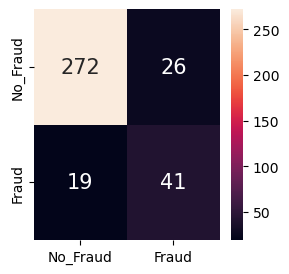

정확도:  87.43%
정밀도:  61.19%
재현율:  68.33%
F1-score:  64.57%
AUC:  79.8%


In [37]:
# 학습
anomaly_isf = IsolationForest(n_estimators=100,
                              n_jobs=-1,
                              max_samples='auto',
                              contamination = 0.17 # contamination : 이상값 비율 (auto (0.05) 또는 float )
                             ) 
anomaly_isf.fit(X_train_pca, y_train_pca)


# 예측
anomaly_isf_pred_pca = anomaly_isf.predict(X_test_pca)
anomaly_isf_pred_pca_map = np.array(list(map(label_mapping, anomaly_isf_pred_pca)))


# 평가
## Confusion mMtrix
plt.figure(figsize=(3,3))
anomaly_isf_pca_con_mat = pd.DataFrame(confusion_matrix(y_test_pca, anomaly_isf_pred_pca_map),
                                 columns=['No_Fraud','Fraud'],
                                 index=['No_Fraud', 'Fraud'])

sns.heatmap(anomaly_isf_pca_con_mat,
            annot=True,
            annot_kws={'size': 15},
            fmt="d")

plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.show()

## 정확도
anomaly_isf_pca_acc = accuracy_score(y_test_pca, anomaly_isf_pred_pca_map)

## 정밀도(Precision): 모델이 True라고 분류한 것 중에서 실제 True인 것의 비율
anomaly_isf_pca_prc = precision_score(y_test_pca, anomaly_isf_pred_pca_map) 

## 재현율(Recall = Sensitivity): 실제 True인 것 중에서 모델이 True라고 예측한 것의 비율
anomaly_isf_pca_rcll = recall_score(y_test_pca, anomaly_isf_pred_pca_map)

## f1-Score
anomaly_isf_pca_f1_score = f1_score(y_test_pca, anomaly_isf_pred_pca_map, average='binary') 
                                                                                             
# ROC-AUC
anomaly_isf_pca_auc = roc_auc_score(y_test_pca, anomaly_isf_pred_pca_map)

print('정확도:  {}%'.format(round( anomaly_isf_pca_acc*100, 2)))
print('정밀도:  {}%'.format(round( anomaly_isf_pca_prc*100, 2)))
print('재현율:  {}%'.format(round( anomaly_isf_pca_rcll*100, 2)))
print('F1-score:  {}%'.format(round( anomaly_isf_pca_f1_score*100, 2)))
print('AUC:  {}%'.format(round( anomaly_isf_pca_auc*100, 2)))

In [38]:
import pandas as pd

# ISF performance values
isf_performance = {
    '정확도': anomaly_isf_pca_acc,
    '정밀도': anomaly_isf_pca_prc,
    '재현율': anomaly_isf_pca_rcll,
    'F1': anomaly_isf_pca_f1_score,
    'AUC': anomaly_isf_pca_auc
}

# Create the dataframe with index as 'pca_ISF'
isf_df = pd.DataFrame(isf_performance, index=['pca_ISF'])

display(isf_df)

df_result = pd.concat([eval_model_perform, isf_df], axis=0)
display(df_result)

,정확도,정밀도,재현율,F1,AUC
pca_ISF,0.874302,0.61194,0.683333,0.645669,0.798043


,정확도,정밀도,재현율,F1,AUC
svm,0.963687,0.952381,0.857143,0.902256,0.981101
Gaussian Naive Bayes,0.944134,0.878788,0.828571,0.852941,0.966815
LightGBM,0.974860,0.984127,0.885714,0.932331,0.977927
pca_ISF,0.874302,0.611940,0.683333,0.645669,0.798043


#### 2번) 차원축소 데이터 vs. 3번)샘플링 데이터  비교
정확도, 재현율, F1 스코어, AUC 등 모든 점수가 SMOTE로 샘플링 한 모델이, 차원축소 후 이상탐지 모델을 만든 것에 비해 성능이 높다.

## 4-3) 데이터 분석가 관점에서 3번에서 만든 모델과 4번에서 만든 모델 설명

- 3번 SMOTE를 통한 분류 모델의 결과가 정확도, 정밀도 등의 모든 평가 점수가 이상탐지 모델에 비해 높게 나왔다.
- 또한 이상거래와 정상거래를 반대로 오탐하는 False Positive, False Negative 점수 또한 SMOTE 모델이 더 높게 나왔다.
- 시간이 중요하면 로지스틱 분류를 사용하고, 정확도가 더 중요한 경우 lightGBM 모델을 사용하면 적절할 것으로 생각한다.